In [1]:
# Import everything needed
from scipy import stats
from toxicity_ranking import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikit_posthocs as sp

In [2]:
ddinter_df = get_ddinter_data()

print('DDInter shape:', ddinter_df.shape)
print(ddinter_df.head())

drugcomb_df = get_drug_comb_data(bliss=True, loewe=True, hsa=True, zip=True)

print('DrugComb shape: ', drugcomb_df.shape)
print(drugcomb_df.head())

DDInter shape: (160235, 5)
   DDInterID_A              Drug_A  DDInterID_B        Drug_B     Level
0  DDInter1263          naltrexone     DDInter1      abacavir  Moderate
1     DDInter1            abacavir  DDInter1348      orlistat  Moderate
2    DDInter58  aluminum hydroxide   DDInter582  dolutegravir     Major
3   DDInter112          aprepitant   DDInter582  dolutegravir     Minor
4   DDInter138         attapulgite   DDInter582  dolutegravir     Major


/Users/alexwong/Research/toxicity-cancer-drug-combination/toxicity_ranking.py:17: DtypeWarning: Columns (2,7,19,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  drugcomb_df = pd.read_csv('data/DrugComb/drugcomb_summary_v_1_5.csv', sep=',', index_col=False)


Original shape of drugcomb data:  (1432351, 26)
Final shape of filtered drugcomb data:  (123882, 26)
DrugComb shape:  (123882, 26)
       block_id                     drug_row     drug_col cell_line_name  \
19054    452451                   ifosfamide  717906-29-1          A-673   
19061    452458  cis-diaminedichloroplatinum  717906-29-1          A-673   
19064    452461                    lomustine  717906-29-1          A-673   
19066    452463                    melphalan  717906-29-1          A-673   
19069    452466                      57-22-7  717906-29-1          A-673   

                 study_name tissue_name conc_row_unit conc_col_unit  \
19054  NCATS_ES(FAKI/AURKI)        bone            uM            uM   
19061  NCATS_ES(FAKI/AURKI)        bone            uM            uM   
19064  NCATS_ES(FAKI/AURKI)        bone            uM            uM   
19066  NCATS_ES(FAKI/AURKI)        bone            uM            uM   
19069  NCATS_ES(FAKI/AURKI)        bone            uM    

In [3]:
drug_syntox_df, major_pairs, moderate_pairs, minor_pairs, unknown_pairs = find_drugcomb_ddinter_intersect(drugcomb_df, ddinter_df)
print('DrugSynergyToxicity shape: ', drug_syntox_df.shape)
print(drug_syntox_df.head())

Number of drugs in common between drugcomb and ddinter [lowercase enforced]:  486
Major pairs in both DrugComb and in DDInter:  335
Moderate pairs in both DrugComb and in DDInter:  1027
Minor pairs in both DrugComb and in DDInter:  59
Unknown toxicity pairs in both DrugComb and in DDInter:  573
Total common pairs:  1994
Total known pairs:  1421
DrugSynergyToxicity shape:  (8659, 8)
           drug_row    drug_col cell_line_name  synergy_zip  synergy_loewe  \
0        mefloquine   tamoxifen          TC-32    19.667559       2.263512   
0  prochlorperazine   tamoxifen          TC-32    12.411371       1.358891   
0      fostamatinib   tamoxifen          TC-32     3.338772       0.978715   
0        fingolimod  mefloquine          TC-32    13.752458       5.414303   
0         dasatinib  mefloquine          TC-32     3.325308       1.635582   

   synergy_bliss  synergy_hsa toxicity_category  
0      25.542924     2.896978          Moderate  
0      14.291624     0.880952          Moderat

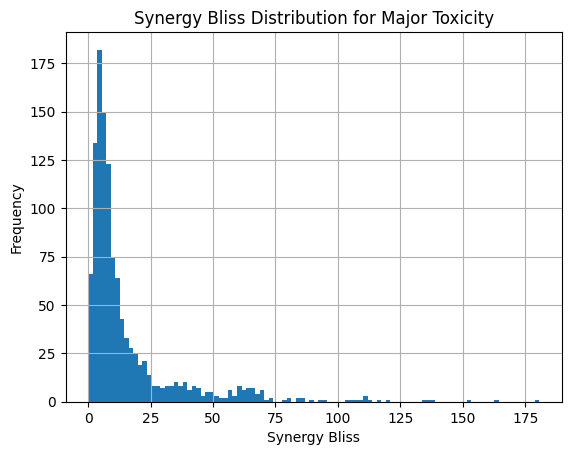

In [4]:
# Create histogram for synergy_bliss for only Major toxicity category in drug_syntox_df
drug_syntox_major = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Major']
drug_syntox_major['synergy_bliss'].hist(bins=100)
plt.xlabel('Synergy Bliss')
plt.ylabel('Frequency')
plt.title('Synergy Bliss Distribution for Major Toxicity')
plt.savefig('results/synergy_bliss_major_hist.png')

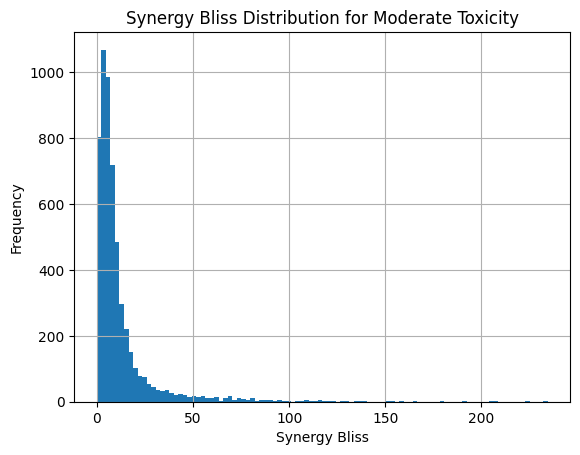

In [5]:
# Create histogram for synergy_bliss for only Moderate toxicity category in drug_syntox_df
drug_syntox_moderate = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Moderate']
drug_syntox_moderate['synergy_bliss'].hist(bins=100)
plt.xlabel('Synergy Bliss')
plt.ylabel('Frequency')
plt.title('Synergy Bliss Distribution for Moderate Toxicity')
plt.savefig('results/synergy_bliss_moderate_hist.png')

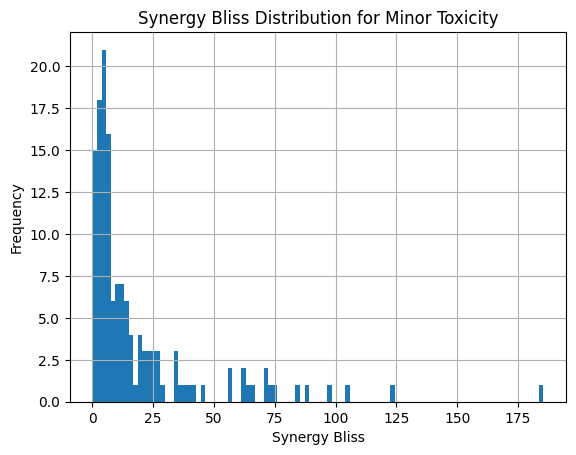

In [6]:
# Create histogram for synergy_bliss for only Minor toxicity category in drug_syntox_df
drug_syntox_minor = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Minor']
drug_syntox_minor['synergy_bliss'].hist(bins=100)
plt.xlabel('Synergy Bliss')
plt.ylabel('Frequency')
plt.title('Synergy Bliss Distribution for Minor Toxicity')
plt.savefig('results/synergy_bliss_minor_hist.png')

In [7]:
major_bliss = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Major']['synergy_bliss']
moderate_bliss = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Moderate']['synergy_bliss']
minor_bliss = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Minor']['synergy_bliss']

h_statistic_bliss, p_value_bliss = stats.kruskal(major_bliss, moderate_bliss, minor_bliss)
print(f'Kruskal-Wallis H statistic for Bliss synergy: {h_statistic_bliss}')
print(f'P-value for Bliss synergy: {p_value_bliss}')

# Filter drug_syntox_df for only Major, Moderate, and Minor toxicity categories
drug_syntox_df = drug_syntox_df[drug_syntox_df['toxicity_category'].isin(['Major', 'Moderate', 'Minor'])]
dunn_bliss = sp.posthoc_dunn(drug_syntox_df, val_col='synergy_bliss', group_col='toxicity_category', p_adjust='bonferroni')
print('Dunn post-hoc test for Bliss synergy:')
print(dunn_bliss)

with open('results/bliss_kruskal_dunn.txt', 'w') as f:
    f.write(f'Kruskal-Wallis H statistic for Bliss synergy: {h_statistic_bliss}\n')
    f.write(f'P-value for Bliss synergy: {p_value_bliss}\n')
    f.write('Dunn post-hoc test for Bliss synergy:\n')
    f.write(str(dunn_bliss))

Kruskal-Wallis H statistic for Bliss synergy: 55.058444366319314
P-value for Bliss synergy: 1.1071608355826638e-12
Dunn post-hoc test for Bliss synergy:
                 Major     Minor      Moderate
Major     1.000000e+00  1.000000  4.244516e-12
Minor     1.000000e+00  1.000000  2.238459e-02
Moderate  4.244516e-12  0.022385  1.000000e+00


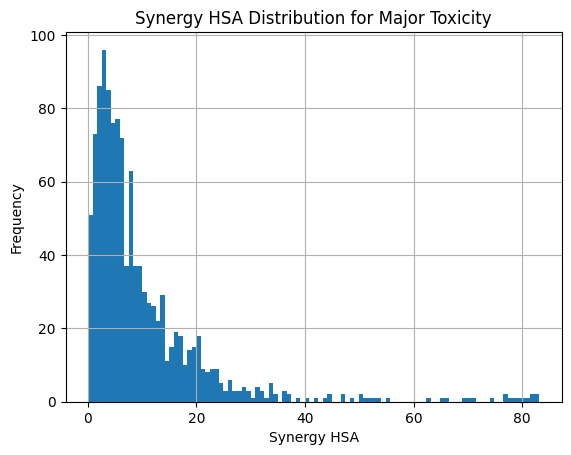

In [8]:
drug_syntox_major['synergy_hsa'].hist(bins=100)
plt.xlabel('Synergy HSA')
plt.ylabel('Frequency')
plt.title('Synergy HSA Distribution for Major Toxicity')
plt.savefig('results/synergy_hsa_major_hist.png')

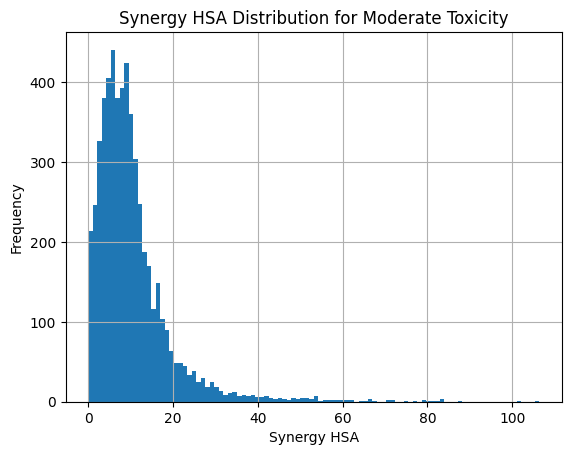

In [9]:
drug_syntox_moderate['synergy_hsa'].hist(bins=100)
plt.xlabel('Synergy HSA')
plt.ylabel('Frequency')
plt.title('Synergy HSA Distribution for Moderate Toxicity')
plt.savefig('results/synergy_hsa_moderate_hist.png')

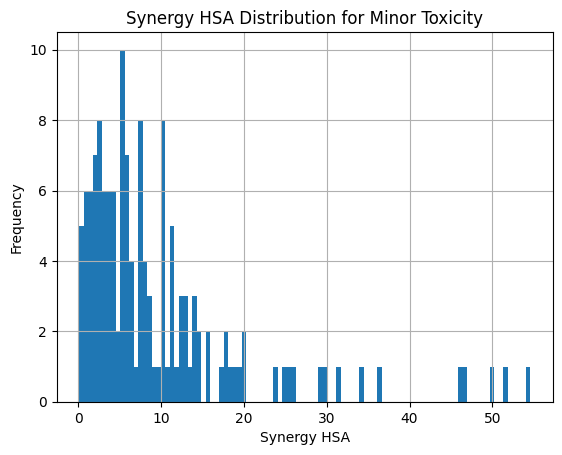

In [10]:
drug_syntox_minor['synergy_hsa'].hist(bins=100)
plt.xlabel('Synergy HSA')
plt.ylabel('Frequency')
plt.title('Synergy HSA Distribution for Minor Toxicity')
plt.savefig('results/synergy_hsa_minor_hist.png')

In [11]:
major_hsa = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Major']['synergy_hsa']
moderate_hsa = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Moderate']['synergy_hsa']
minor_hsa = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Minor']['synergy_hsa']

h_statistic_hsa, p_value_hsa = stats.kruskal(major_hsa, moderate_hsa, minor_hsa)
print(f'Kruskal-Wallis H statistic for HSA synergy: {h_statistic_hsa}')
print(f'P-value for HSA synergy: {p_value_hsa}')

dunn_hsa = sp.posthoc_dunn(drug_syntox_df, val_col='synergy_hsa', group_col='toxicity_category', p_adjust='bonferroni')
print('Dunn post-hoc test for HSA synergy:')
print(dunn_hsa)

with open('results/hsa_kruskal_dunn.txt', 'w') as f:
    f.write(f'Kruskal-Wallis H statistic for HSA synergy: {h_statistic_hsa}\n')
    f.write(f'P-value for HSA synergy: {p_value_hsa}\n')
    f.write('Dunn post-hoc test for HSA synergy:\n')
    f.write(str(dunn_hsa))


Kruskal-Wallis H statistic for HSA synergy: 56.14938032336445
P-value for HSA synergy: 6.416777516661703e-13
Dunn post-hoc test for HSA synergy:
                 Major     Minor      Moderate
Major     1.000000e+00  1.000000  2.018088e-12
Minor     1.000000e+00  1.000000  2.816511e-02
Moderate  2.018088e-12  0.028165  1.000000e+00


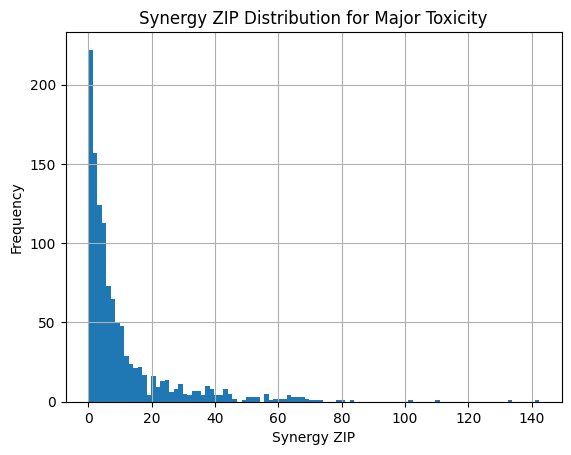

In [12]:
drug_syntox_major['synergy_zip'].hist(bins=100)
plt.xlabel('Synergy ZIP')
plt.ylabel('Frequency')
plt.title('Synergy ZIP Distribution for Major Toxicity')
plt.savefig('results/synergy_zip_major_hist.png')


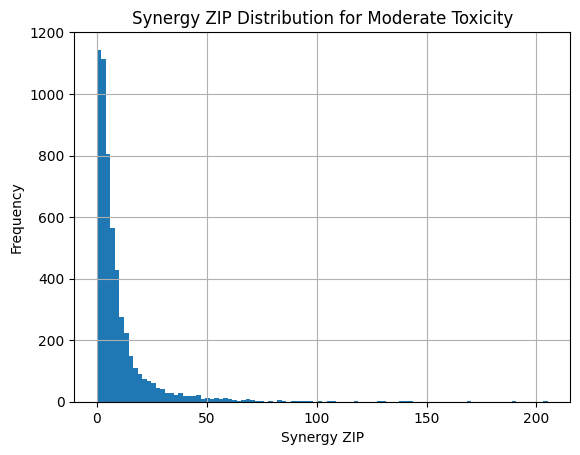

In [13]:
drug_syntox_moderate['synergy_zip'].hist(bins=100)
plt.xlabel('Synergy ZIP')
plt.ylabel('Frequency')
plt.title('Synergy ZIP Distribution for Moderate Toxicity')
plt.savefig('results/synergy_zip_moderate_hist.png')

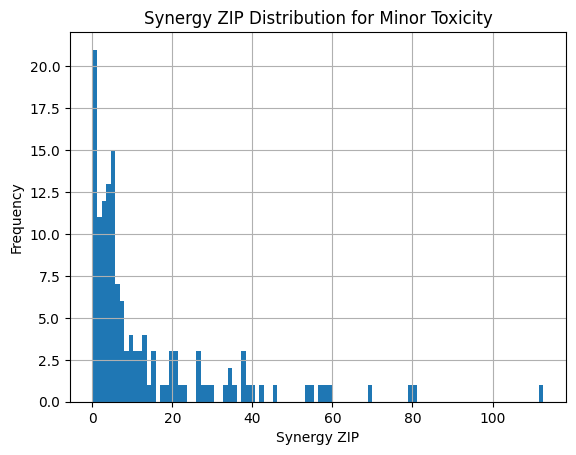

In [14]:
drug_syntox_minor['synergy_zip'].hist(bins=100)
plt.xlabel('Synergy ZIP')
plt.ylabel('Frequency')
plt.title('Synergy ZIP Distribution for Minor Toxicity')
plt.savefig('results/synergy_zip_minor_hist.png')

In [15]:
major_zip = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Major']['synergy_zip']
moderate_zip = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Moderate']['synergy_zip']
minor_zip = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Minor']['synergy_zip']

h_statistic_zip, p_value_zip = stats.kruskal(major_zip, moderate_zip, minor_zip)
print(f'Kruskal-Wallis H statistic for ZIP synergy: {h_statistic_zip}')
print(f'P-value for ZIP synergy: {p_value_zip}')

dunn_zip = sp.posthoc_dunn(drug_syntox_df, val_col='synergy_zip', group_col='toxicity_category', p_adjust='bonferroni')
print('Dunn post-hoc test for ZIP synergy:')
print(dunn_zip)

with open('results/zip_kruskal_dunn.txt', 'w') as f:
    f.write(f'Kruskal-Wallis H statistic for ZIP synergy: {h_statistic_zip}\n')
    f.write(f'P-value for ZIP synergy: {p_value_zip}\n')
    f.write('Dunn post-hoc test for ZIP synergy:\n')
    f.write(str(dunn_zip))


Kruskal-Wallis H statistic for ZIP synergy: 2.945465723187226
P-value for ZIP synergy: 0.22929798848022867
Dunn post-hoc test for ZIP synergy:
             Major     Minor  Moderate
Major     1.000000  0.271411  1.000000
Minor     0.271411  1.000000  0.278867
Moderate  1.000000  0.278867  1.000000


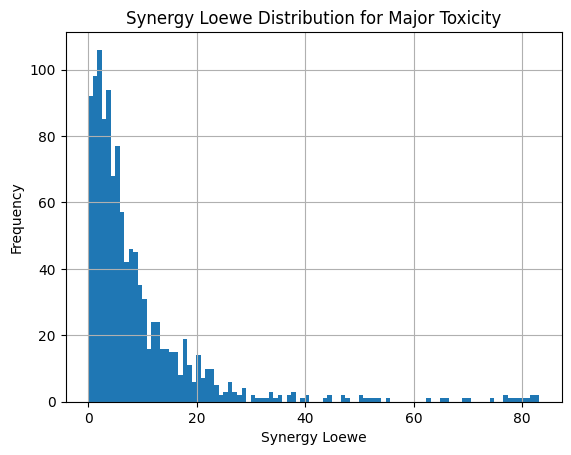

In [16]:
drug_syntox_major['synergy_loewe'].hist(bins=100)
plt.xlabel('Synergy Loewe')
plt.ylabel('Frequency')
plt.title('Synergy Loewe Distribution for Major Toxicity')
plt.savefig('results/synergy_loewe_major_hist.png')

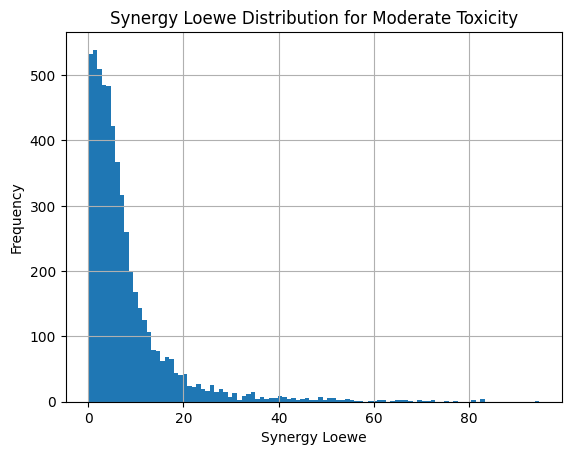

In [17]:
drug_syntox_moderate['synergy_loewe'].hist(bins=100)
plt.xlabel('Synergy Loewe')
plt.ylabel('Frequency')
plt.title('Synergy Loewe Distribution for Moderate Toxicity')
plt.savefig('results/synergy_loewe_moderate_hist.png')

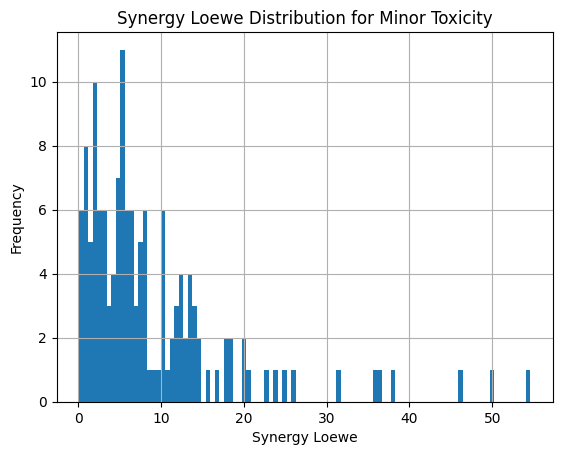

In [18]:
drug_syntox_minor['synergy_loewe'].hist(bins=100)
plt.xlabel('Synergy Loewe')
plt.ylabel('Frequency')
plt.title('Synergy Loewe Distribution for Minor Toxicity')
plt.savefig('results/synergy_loewe_minor_hist.png')

In [19]:
major_loewe = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Major']['synergy_loewe']
moderate_loewe = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Moderate']['synergy_loewe']
minor_loewe = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Minor']['synergy_loewe']

h_statistic_loewe, p_value_loewe = stats.kruskal(major_loewe, moderate_loewe, minor_loewe)
print(f'Kruskal-Wallis H statistic for Loewe synergy: {h_statistic_loewe}')
print(f'P-value for Loewe synergy: {p_value_loewe}')

dunn_loewe = sp.posthoc_dunn(drug_syntox_df, val_col='synergy_loewe', group_col='toxicity_category', p_adjust='bonferroni')
print('Dunn post-hoc test for Loewe synergy:')
print(dunn_loewe)

with open('results/loewe_kruskal_dunn.txt', 'w') as f:
    f.write(f'Kruskal-Wallis H statistic for Loewe synergy: {h_statistic_loewe}\n')
    f.write(f'P-value for Loewe synergy: {p_value_loewe}\n')
    f.write('Dunn post-hoc test for Loewe synergy:\n')
    f.write(str(dunn_loewe))


Kruskal-Wallis H statistic for Loewe synergy: 7.0731227817923354
P-value for Loewe synergy: 0.02911326429687073
Dunn post-hoc test for Loewe synergy:
             Major     Minor  Moderate
Major     1.000000  0.548234  0.217534
Minor     0.548234  1.000000  0.113699
Moderate  0.217534  0.113699  1.000000


In [23]:
# What if you combine moderate and minor toxicity categories?
drug_syntox_df['toxicity_category'] = drug_syntox_df['toxicity_category'].replace('Moderate', 'Moderate/Minor')
drug_syntox_df['toxicity_category'] = drug_syntox_df['toxicity_category'].replace('Minor', 'Moderate/Minor')

# BLISS
moderate_minor_bliss = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Moderate/Minor']['synergy_bliss']

h_statistic_bliss_tolerable, p_value_bliss_tolerable = stats.kruskal(major_bliss, moderate_minor_bliss)
print(f'Kruskal-Wallis H statistic for Bliss synergy (Moderate/Minor combined): {h_statistic_bliss_tolerable}')
print(f'P-value for Bliss synergy (Moderate/Minor combined): {p_value_bliss_tolerable}')

mwy_statistic_bliss_tolerable, mwy_p_value_bliss_tolerable = stats.mannwhitneyu(major_bliss, moderate_minor_bliss, alternative='two-sided')
print(f'Mann-Whitney U statistic for Bliss synergy (Major vs. Moderate/Minor): {mwy_statistic_bliss_tolerable}')
print(f'P-value for Bliss synergy (Major vs. Moderate/Minor): {mwy_p_value_bliss_tolerable}')

with open('results/bliss_kruskal_tolerable.txt', 'w') as f:
    f.write(f'Kruskal-Wallis H statistic for Bliss synergy (Moderate/Minor combined): {h_statistic_bliss_tolerable}\n')
    f.write(f'P-value for Bliss synergy (Moderate/Minor combined): {p_value_bliss_tolerable}\n')
    f.write(f'Mann-Whitney U statistic for Bliss synergy (Major vs. Moderate/Minor): {mwy_statistic_bliss_tolerable}\n')
    f.write(f'P-value for Bliss synergy (Major vs. Moderate/Minor): {mwy_p_value_bliss_tolerable}\n')

# HSA
moderate_minor_hsa = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Moderate/Minor']['synergy_hsa']

h_statistic_hsa_tolerable, p_value_hsa_tolerable = stats.kruskal(major_hsa, moderate_minor_hsa)
print(f'Kruskal-Wallis H statistic for HSA synergy (Moderate/Minor combined): {h_statistic_hsa_tolerable}')
print(f'P-value for HSA synergy (Moderate/Minor combined): {p_value_hsa_tolerable}')

mwy_statistic_hsa_tolerable, mwy_p_value_hsa_tolerable = stats.mannwhitneyu(major_hsa, moderate_minor_hsa, alternative='two-sided')
print(f'Mann-Whitney U statistic for HSA synergy (Major vs. Moderate/Minor): {mwy_statistic_hsa_tolerable}')
print(f'P-value for HSA synergy (Major vs. Moderate/Minor): {mwy_p_value_hsa_tolerable}')

with open('results/hsa_kruskal_tolerable.txt', 'w') as f:
    f.write(f'Kruskal-Wallis H statistic for HSA synergy (Moderate/Minor combined): {h_statistic_hsa_tolerable}\n')
    f.write(f'P-value for HSA synergy (Moderate/Minor combined): {p_value_hsa_tolerable}\n')
    f.write(f'Mann-Whitney U statistic for HSA synergy (Major vs. Moderate/Minor): {mwy_statistic_hsa_tolerable}\n')
    f.write(f'P-value for HSA synergy (Major vs. Moderate/Minor): {mwy_p_value_hsa_tolerable}\n')

# ZIP
moderate_minor_zip = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Moderate/Minor']['synergy_zip']

h_statistic_zip_tolerable, p_value_zip_tolerable = stats.kruskal(major_zip, moderate_minor_zip)
print(f'Kruskal-Wallis H statistic for ZIP synergy (Moderate/Minor combined): {h_statistic_zip_tolerable}')
print(f'P-value for ZIP synergy (Moderate/Minor combined): {p_value_zip_tolerable}')

mwy_statistic_zip_tolerable, mwy_p_value_zip_tolerable = stats.mannwhitneyu(major_zip, moderate_minor_zip, alternative='two-sided')
print(f'Mann-Whitney U statistic for ZIP synergy (Major vs. Moderate/Minor): {mwy_statistic_zip_tolerable}')
print(f'P-value for ZIP synergy (Major vs. Moderate/Minor): {mwy_p_value_zip_tolerable}')

with open('results/zip_kruskal_tolerable.txt', 'w') as f:
    f.write(f'Kruskal-Wallis H statistic for ZIP synergy (Moderate/Minor combined): {h_statistic_zip_tolerable}\n')
    f.write(f'P-value for ZIP synergy (Moderate/Minor combined): {p_value_zip_tolerable}\n')
    f.write(f'Mann-Whitney U statistic for ZIP synergy (Major vs. Moderate/Minor): {mwy_statistic_zip_tolerable}\n')
    f.write(f'P-value for ZIP synergy (Major vs. Moderate/Minor): {mwy_p_value_zip_tolerable}\n')

# LOEWE
moderate_minor_loewe = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Moderate/Minor']['synergy_loewe']

h_statistic_loewe_tolerable, p_value_loewe_tolerable = stats.kruskal(major_loewe, moderate_minor_loewe)
print(f'Kruskal-Wallis H statistic for Loewe synergy (Moderate/Minor combined): {h_statistic_loewe_tolerable}')
print(f'P-value for Loewe synergy (Moderate/Minor combined): {p_value_loewe_tolerable}')

mwy_statistic_loewe_tolerable, mwy_p_value_loewe_tolerable = stats.mannwhitneyu(major_loewe, moderate_minor_loewe, alternative='two-sided')
print(f'Mann-Whitney U statistic for Loewe synergy (Major vs. Moderate/Minor): {mwy_statistic_loewe_tolerable}')
print(f'P-value for Loewe synergy (Major vs. Moderate/Minor): {mwy_p_value_loewe_tolerable}')

with open('results/loewe_kruskal_tolerable.txt', 'w') as f:
    f.write(f'Kruskal-Wallis H statistic for Loewe synergy (Moderate/Minor combined): {h_statistic_loewe_tolerable}\n')
    f.write(f'P-value for Loewe synergy (Moderate/Minor combined): {p_value_loewe_tolerable}\n')
    f.write(f'Mann-Whitney U statistic for Loewe synergy (Major vs. Moderate/Minor): {mwy_statistic_loewe_tolerable}\n')
    f.write(f'P-value for Loewe synergy (Major vs. Moderate/Minor): {mwy_p_value_loewe_tolerable}\n')


Kruskal-Wallis H statistic for Bliss synergy (Moderate/Minor combined): 47.90008245171006
P-value for Bliss synergy (Moderate/Minor combined): 4.485027566444928e-12
Mann-Whitney U statistic for Bliss synergy (Major vs. Moderate/Minor): 3707998.0
P-value for Bliss synergy (Major vs. Moderate/Minor): 4.48528664547392e-12
Kruskal-Wallis H statistic for HSA synergy (Moderate/Minor combined): 49.40196719388493
P-value for HSA synergy (Moderate/Minor combined): 2.0853642567624018e-12
Mann-Whitney U statistic for HSA synergy (Major vs. Moderate/Minor): 2855521.5
P-value for HSA synergy (Major vs. Moderate/Minor): 2.085486521811933e-12
Kruskal-Wallis H statistic for ZIP synergy (Moderate/Minor combined): 0.123034956290212
P-value for ZIP synergy (Moderate/Minor combined): 0.725765864215081
Mann-Whitney U statistic for ZIP synergy (Major vs. Moderate/Minor): 3263614.0
P-value for ZIP synergy (Major vs. Moderate/Minor): 0.7257720028914179
Kruskal-Wallis H statistic for Loewe synergy (Moderate/Mi

In [22]:
# Generate histograms for tolerable toxicity category (Moderate/Minor combined)
drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Moderate/Minor']['synergy_bliss'].hist(bins=100)
plt.xlabel('Synergy Bliss')
plt.ylabel('Frequency')
plt.title('Synergy Bliss Distribution for Moderate/Minor Toxicity')
plt.savefig('results/synergy_bliss_tolerable_hist.png')
plt.close()

drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Moderate/Minor']['synergy_hsa'].hist(bins=100)
plt.xlabel('Synergy HSA')
plt.ylabel('Frequency')
plt.title('Synergy HSA Distribution for Moderate/Minor Toxicity')
plt.savefig('results/synergy_hsa_tolerable_hist.png')
plt.close()

drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Moderate/Minor']['synergy_zip'].hist(bins=100)
plt.xlabel('Synergy ZIP')
plt.ylabel('Frequency')
plt.title('Synergy ZIP Distribution for Moderate/Minor Toxicity')
plt.savefig('results/synergy_zip_tolerable_hist.png')
plt.close()

drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Moderate/Minor']['synergy_loewe'].hist(bins=100)
plt.xlabel('Synergy Loewe')
plt.ylabel('Frequency')
plt.title('Synergy Loewe Distribution for Moderate/Minor Toxicity')
plt.savefig('results/synergy_loewe_tolerable_hist.png')
plt.close()